# Using PyTorch + Gradient Descent for Calculus Fun
The core of deep learning involves function optimization to find the weights of a neural network.  
This experiement is to see if we can use Pytorch's Autograd to calculate partial derivatives and find the minima of a function by applying gradient descent iteratively.

For instance, for the function y = x^2 - x, using simple calculus, the derivative is 2x -1, and the function has a minima at 0.5

Can we computationally get this result using Pytorch's autograd?
The idea would be to calculate the partial derivative and to apply step by step gradient descent to get the mimima --> AND IT WORKS!

The code below takes as input any polynomial function (can be extended to other functions, but need to enhance the parsing)

## User Input: Specify the input function for which you would like to find the minima

In [144]:
# Format (any polynomial function, y = ax^n + ... 
# Eg : myfunc = x^4 - 10x^3 + x2 -5x +1
my_poly_func = "2x^4 - 25x^3 + 10x^2 + 2x -1"

## Parsing Code to get exponents and coefficients

In [145]:
def parse_polynomial(poly):
    import re

    # Normalize the polynomial string
    poly = poly.replace('-', '+-').replace(' ', '')

    # Split into terms
    terms = poly.split('+')
    
    exponents = []
    coefficients = []

    for term in terms:
        if 'x' in term:
            if '^' in term:
                coeff, exp = term.split('x^')
            else: #s special case of 1
                terms = term.split('x')
                coeff = terms[0]
                exp = 1

            # Convert coefficient to 1 if it's empty or - if it's just a minus sign
            coeff = 1 if coeff == '' or coeff == '+' else -1 if coeff == '-' else int(coeff)
            exp = int(exp)
        else:
            coeff = int(term)
            exp = 0

        coefficients.append(coeff)
        exponents.append(exp)

    # Ensuring that the terms are in the correct order (from highest to lowest exponent)
    combined = sorted(zip(exponents, coefficients), reverse=True)
    exponents, coefficients = zip(*combined)

    # Convert to lists
    return list(exponents), list(coefficients)

In [146]:
exps, coeffs = parse_polynomial(my_poly_func)
print("Function: ", my_poly_func)
print("======== After Parsing =======")
print("Exponents: ", exps)
print("Coefficients: ", coeffs)


Function:  2x^4 - 25x^3 + 10x^2 + 2x -1
======== After Parsing =======
Exponents:  [4, 3, 2, 1, 0]
Coefficients:  [2, -25, 10, 2, -1]


## Using PyTorch to find the function minima
Requires setting up an optimization problem and performing gradient descent

In [147]:
def get_y_function(x, coefficients, exponents):
    y = torch.zeros(1)
    for i in range(len(coefficients)):
        coeff = coefficients[i]
        exp = exponents[i]
        y = y + coeff * (x**exp)
    return y

learning_rate = 0.01
num_iterations = 1000
x = torch.rand(1, requires_grad=True)
for i in range(num_iterations):
    y = get_y_function(x, coeffs, exps)
    y.backward()
    x.data = x.data- alpha * x.grad
    x.grad.zero_() 

minima = x.data
print("The function minima is ", minima.data.item())

The function minima is  -0.07736797630786896


## Plot the results

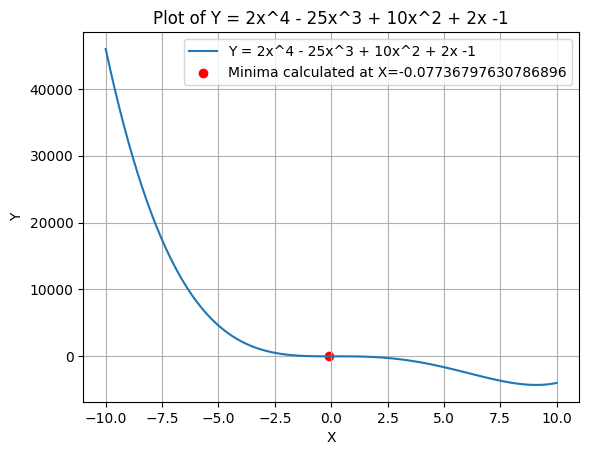

In [149]:
import torch
import matplotlib.pyplot as plt

# Create a tensor X
X = torch.linspace(-10, 10, steps=100)  # A tensor from -10 to 10 with 100 steps

# Compute Y = X * X - 1
Y = get_y_function(X, coeffs, exps)

# Convert tensors to numpy arrays for plotting
X_np = X.numpy()
Y_np = Y.numpy()

# Plot Y vs X
plt.plot(X_np, Y_np, label='Y = ' + my_poly_func)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Y = ' + my_poly_func)

# Calculate the point at X=1
#x_point = torch.tensor([1])
y_point = get_y_function(minima, coeffs, exps)

# Plot the point at X=1 in red
plt.scatter(minima.numpy(), y_point.numpy(), color='red', label='Minima calculated at X=' + str(minima.data.item()))

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Show the plot
plt.show()
